In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math
#解决中文显示问题
plt.rcParams['font.sans-serif'] = ['KaiTi'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
plt.rcParams['figure.dpi'] = 150

## 1. 按照Lomax distribution / Pareto Type II distribution 生成交易次数矩阵

In [ ]:
np.random.seed(1919)
a = 2 # shape 
s = (np.random.pareto(a, 40000)) 

In [ ]:
s.max()

In [ ]:
s.min()

In [ ]:
axes = plt.gca()
axes.set_title('交易次数的样本分布')
count, bins, _ = axes.hist(s, density=True,bins=np.arange(0, 160, 1))
# sns.distplot(s,kde=True,bins=np.arange(0, 25, 1))
plt.show()

In [ ]:
s_round = np.round(s)

ax = plt.gca()
ax.set_title('交易次数的样本分布(取整)')

count, bins, _ = ax.hist(s_round, density=True,bins=np.arange(0, 160, 1))

plt.show()

In [ ]:
unique, counts = np.unique(s_round, return_counts=True)
dict(zip(unique, counts))

In [ ]:
times = s.reshape((200,200))

## 2. 按照Lomax distribution / Pareto Type II distribution 生成交易金额矩阵

In [ ]:
np.random.seed(1902)
b = 1.6
t = (np.random.pareto(b, 40000))
t = np.around(t,decimals=8)

In [ ]:
t.max()

In [ ]:
t.min()

In [ ]:
unique, counts = np.unique(t, return_counts=True)
dict(zip(unique, counts))

In [ ]:
axes = plt.gca()
axes.set_title('单次交易金额的样本分布(左局部)')
# axes.set_ylim([0,1])
count, bins, _ = axes.hist(t, density=True,bins=np.arange(0, 160, 1))
# sns.distplot(s,kde=True,bins=np.arange(0, 25, 1))
plt.show()

In [ ]:
volume = t.reshape((200,200))

### 3. 获得最终交易网络清单

In [ ]:
 raw_trade = np.multiply(times,volume)

In [ ]:
raw_trade.shape

### 4. 生成交易可能性表格

对25名违法分子而言：

In [3]:
unit_row = np.repeat([1,-1],[25,175])

In [4]:
unit_row = unit_row.reshape(1,200)

In [5]:
status = np.repeat(unit_row,25,axis=0)

In [6]:
status_table = pd.DataFrame(status)

In [7]:
status_table

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,1,1,1,1,1,1,1,1,1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,1,1,1,1,1,1,1,1,1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,1,1,1,1,1,1,1,1,1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,1,1,1,1,1,1,1,1,1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,1,1,1,1,1,1,1,1,1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
5,1,1,1,1,1,1,1,1,1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
6,1,1,1,1,1,1,1,1,1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
7,1,1,1,1,1,1,1,1,1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
8,1,1,1,1,1,1,1,1,1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
9,1,1,1,1,1,1,1,1,1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [8]:
def sigmoid(x):
  return 1 / (1 + math.exp(-x - np.random.normal(0,1,1)))
def sigmoid_original(x):
  return 1 / (1 + math.exp(-x))

In [11]:
mean_illegal = sigmoid_original(1*(1 + math.pi / 8)**(-0.5))
mean_illegal

0.7000144407062076

In [12]:
sample = [float(sigmoid(1)) for i in range(100000)]
sum(sample) / len(sample)

0.6962558801852791

In [13]:
np.random.seed(2000)
status_copy = status_table.copy()
status_copy = status_copy.applymap(sigmoid)
block1 = status_copy.applymap(lambda x:np.round(x))

In [14]:
block1

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
block2 = block1.iloc[:,25:].transpose()
block2

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
26,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
29,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
198,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
from scipy.stats import bernoulli
np.random.seed(9)
legal = bernoulli.rvs(1/3, size=175*175).reshape((175,175))

In [17]:
legal

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 1, 0, 1],
       [0, 1, 1, ..., 1, 0, 0],
       ...,
       [0, 1, 0, ..., 1, 1, 0],
       [1, 0, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0]])

In [18]:
block3 = pd.DataFrame(legal,columns=range(25,200))
block3

,25,26,27,28,29,30,31,32,33,34,...,190,191,192,193,194,195,196,197,198,199
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,1,0,1,0,0,0,0,1,0,1,...,0,1,1,0,0,0,0,1,0,1
2,0,1,1,0,1,0,1,0,0,0,...,0,0,1,0,1,1,1,1,0,0
3,0,0,0,0,0,0,1,1,1,0,...,0,1,0,0,0,0,0,0,1,0
4,1,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,0,0,1,1,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
171,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,1,0
172,0,1,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
173,1,0,0,1,1,1,0,0,0,1,...,1,1,0,1,1,1,0,1,0,0


In [19]:
block2.reset_index(drop=True,inplace=True)

In [ ]:
block2

In [20]:
block2.index = range(25,200)

In [ ]:
block2

In [21]:
block3.index = range(25,200)

In [ ]:
block3

In [22]:
block4 = pd.merge(block2,block3,left_index=True,right_index=True)

In [ ]:
block4

In [23]:
network = pd.concat([block1,block4])

In [24]:
network

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
197,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
198,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0


In [25]:
x_axis = []
y_axis = []
point = []
for i in range(200):
    for j in range(200):
        if network.iloc[i,j] == 1:
            x_axis.append(i)
            y_axis.append(j)

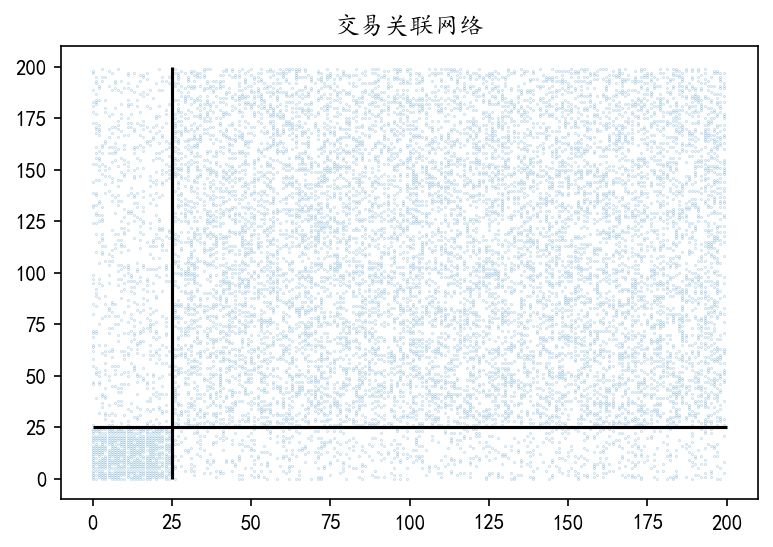

In [26]:
ax = plt.gca()
ax.set_title('交易关联网络')
ax.vlines(x=25,ymin=0,ymax=200) 
ax.hlines(y=25,xmin=0,xmax=200)
ax.scatter(x=x_axis,y=y_axis,s=1/100)

In [27]:
network.to_csv('network.csv')